In [30]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

In [31]:
data = pd.read_csv('../data/processed/job_offers_2024_08_18.csv', sep=';', decimal='.', encoding='UTF-8')
data.head()

,Name,Company,Location,Technologies,Salary Low,Salary High,Currency,Salary_avg,location_country,is_senior,pozice
0,marketing (data) analyst,Codete,remote,Data SQL Python R,7000.0,12500.0,PLN,9750.0,NaN,0,analyst
1,senior data analyst,Infogain Technologies Sp. z o.o.,remote,Data SQL R programming Data management,21840.0,26880.0,PLN,24360.0,NaN,1,analyst
2,data analyst,Sunscrapers,remote,Data SQL Data analysis Data visualization,20000.0,25000.0,PLN,22500.0,NaN,0,analyst
3,data analyst /product analyst,apreel Sp. z o.o.,warsaw,Data SQL Cloud computing UX,23520.0,28560.0,PLN,26040.0,PL,0,analyst
4,mid sql data analyst,Ośrodek Przetwarzania Informacji - Państwowy I...,warsaw,Data SQL pandas Python,8000.0,10000.0,PLN,9000.0,PL,0,analyst


# 1.Kolik pracovních míst pro konkrétní pozici bylo nalezeno?  
job_names = ['data analyst', 'data engineer', 'data scientist']

In [32]:
data['Name'].shape

(246,)

In [33]:
scientist = data.loc[data['Name'].apply(lambda x: True if re.search('scientist', x) else False),]
analyst = data.loc[data['Name'].apply(lambda x: True if re.search('analyst', x) else False),]
engineer = data.loc[data['Name'].apply(lambda x: True if re.search('engineer', x) else False),]

print(f'Number of Analyst jobs is {analyst.shape[0]}' )
print(f'Number of Engineer jobs is {engineer.shape[0]}' )
print(f'Number of Scientist jobs is {scientist.shape[0]}' )


Number of Analyst jobs is 9
Number of Engineer jobs is 151
Number of Scientist jobs is 23


# 2. Jaká je průměrná mzda za každou práci?


In [34]:
analyst_avg = round(analyst['Salary_avg'].mean(), 2)
engineer_avg = round(engineer['Salary_avg'].mean(), 2)
scientist_avg = round(scientist['Salary_avg'].mean(), 2)

print ('Average salary per position Analyst:', analyst_avg, 'PLN')
print ('Average salary per position Engineer:', engineer_avg, 'PLN')
print ('Average salary per position Scientist:', scientist_avg, 'PLN')

Average salary per position Analyst: 19283.33 PLN
Average salary per position Engineer: 24966.31 PLN
Average salary per position Scientist: 24475.41 PLN


# 3. Které město má nejvíce pracovních nabídek?

In [35]:
data['Location'].unique()

array(['remote', 'warsaw', 'poznań', 'tczew', 'gdynia', 'gdańsk', 'łódź',
       'kraków', 'wrocław', 'białystok'], dtype=object)

In [36]:
# Filtrace dat, aby se odstranily 'Remote' pozice
filtered_data = data[~data['Location'].str.contains('Remote', case=False, na=False)]

# Agregace podle Location
data_grouped_by_location = filtered_data.groupby('Location')

# Výstup počtu pozic v každém městě
for location, grouped_data in data_grouped_by_location:
    print(f"There are {len(grouped_data)} job offers in {location}.")

There are 1 job offers in białystok.
There are 3 job offers in gdańsk.
There are 3 job offers in gdynia.
There are 19 job offers in kraków.
There are 5 job offers in poznań.
There are 2 job offers in tczew.
There are 38 job offers in warsaw.
There are 3 job offers in wrocław.
There are 4 job offers in łódź.


# 4. Kde je nabízena nejvyšší sazba?

In [37]:
data_grouped_by_location['Salary High'].max()

Location
białystok    30000.0
gdańsk       29400.0
gdynia       32000.0
kraków       40000.0
poznań       26376.0
tczew        20000.0
warsaw       64000.0
wrocław      31500.0
łódź         29400.0
Name: Salary High, dtype: float64

# 5. Jaký je rozdíl mezi nabídkou pro běžného a seniora ?

In [38]:
result = data.groupby('is_senior').agg(
    count=('is_senior', 'size'),
    avg_salary=('Salary_avg','mean')
).reset_index()
round(result, 2)


,is_senior,count,avg_salary
0,0,144,23728.02
1,1,102,25334.22


# 6. Jaké jsou nejnižší možné náklady na pronájem týmu složeného z datového analytika, datového inženýra a datového vědce?

In [39]:
analyst_min = round(analyst['Salary Low'].min(), 2)
engineer_min = round(engineer['Salary Low'].min(), 2)
scientist_min = round(scientist['Salary Low'].min(), 2)

print ('Minimum salary per position Analyst:', analyst_min, 'PLN')
print ('Minimum salary per position Engineer:', engineer_min, 'PLN')
print ('Minimum salary per position Scientist:', scientist_min, 'PLN')

Minimum salary per position Analyst: 7000.0 PLN
Minimum salary per position Engineer: 4500.0 PLN
Minimum salary per position Scientist: 14280.0 PLN


# 7. Je možné, aby tým vznikl v jednom městě? Pokud ano, kde by to bylo nejlevnější?

In [40]:
pivot = data.pivot_table(
    index='Location', 
    columns= 'pozice', 
    aggfunc='size', 
    fill_value=0
    )
# Přesvědčíme se, že každá z pozic je v daném městě alespoň jednou zastoupena
pivot

pozice,0,analyst,engineer,scientist
Location,,,,
białystok,0,0,1,0
gdańsk,3,0,0,0
gdynia,1,0,0,2
kraków,2,0,16,1
poznań,2,0,3,0
remote,41,5,110,12
tczew,2,0,0,0
warsaw,14,4,18,2
wrocław,0,0,3,0


Ano pouze ve Warsaw

In [41]:
pivot = data.pivot_table(
    index='Location', 
    columns= 'pozice', 
    values='Salary Low',
    aggfunc='min', 
    fill_value=0
    )
# Přesvědčíme se, že každá z pozic je v daném městě alespoň jednou zastoupena
pivot

pozice,0,analyst,engineer,scientist
Location,,,,
białystok,0.0,0.0,24000.0,0.0
gdańsk,25200.0,0.0,0.0,0.0
gdynia,27000.0,0.0,0.0,17000.0
kraków,28000.0,0.0,15000.0,26000.0
poznań,18000.0,0.0,19320.0,0.0
remote,7000.0,7000.0,7000.0,16254.0
tczew,17000.0,0.0,0.0,0.0
warsaw,7600.0,8000.0,4500.0,22400.0
wrocław,0.0,0.0,26500.0,0.0


# Kromě toho vizualizujte podsekce 1–5 pomocí typů grafů podle vašeho výběru.

1. Počet pozic

In [42]:
num_analyst = analyst.shape[0]
num_engineer = engineer.shape[0]
num_scientist = scientist.shape[0]


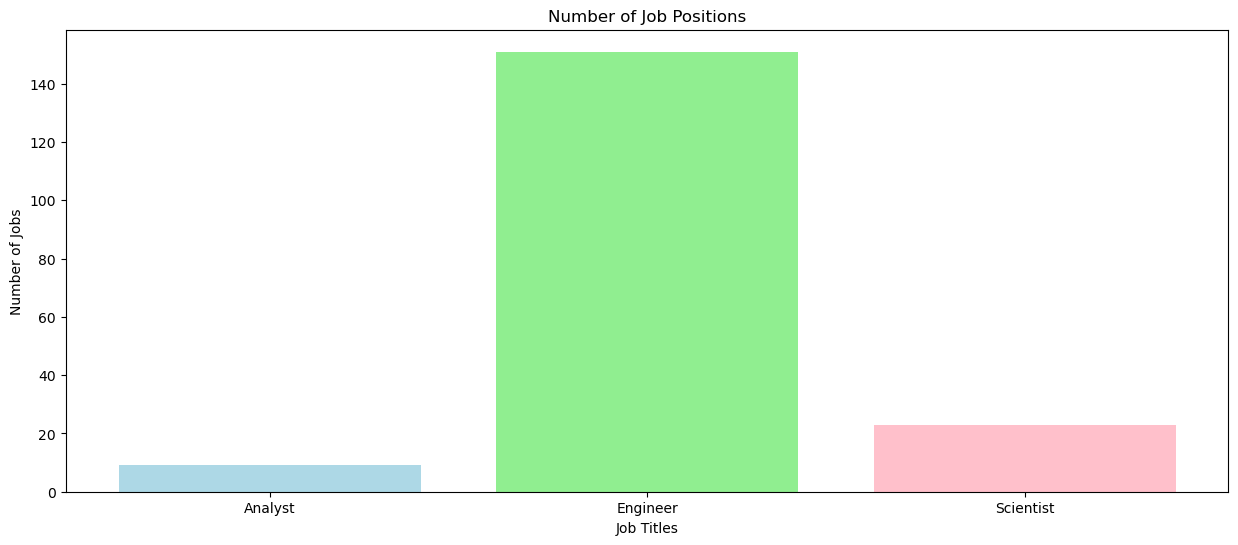

In [43]:
categories = ['Analyst', 'Engineer', 'Scientist']
counts = [num_analyst, num_engineer, num_scientist]

# Vytvoření grafu
plt.figure(figsize=(15, 6))
plt.bar(categories, counts, color=['lightblue', 'lightgreen', 'pink'])
plt.xlabel('Job Titles')
plt.ylabel('Number of Jobs')
plt.title('Number of Job Positions')
plt.show()


2. průměrná mzda

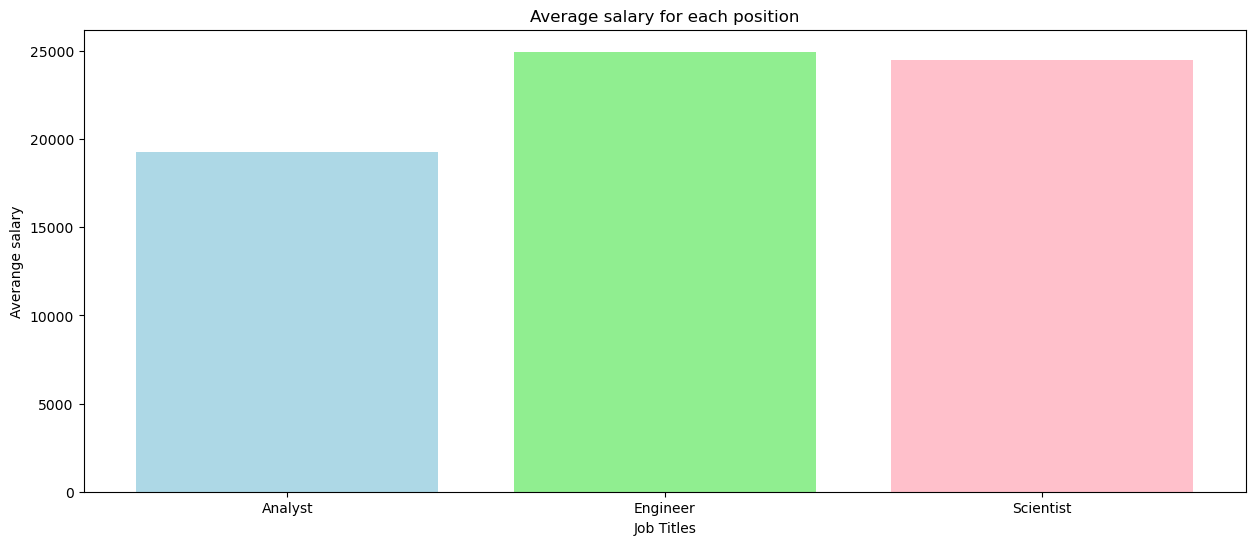

In [44]:
categories = ['Analyst', 'Engineer', 'Scientist']
counts = [analyst_avg, engineer_avg, scientist_avg]

# Vytvoření grafu
plt.figure(figsize=(15, 6))
plt.bar(categories, counts, color=['lightblue', 'lightgreen', 'pink'])
plt.xlabel('Job Titles')
plt.ylabel('Averange salary')
plt.title('Average salary for each position')
plt.show()


3. které město má nejvíce nabídek

In [45]:
# Filtrace dat, aby se odstranily 'Remote' pozice
filtered_data = data[~data['Location'].str.contains('Remote', case=False, na=False)]

# Agregace podle Location
data_grouped_by_location = filtered_data.groupby('Location')

locations = []
counts = []
# Výstup počtu pozic v každém městě
for location, grouped_data in data_grouped_by_location:
    print(f"There are {len(grouped_data)} job offers in {location}.")

    locations.append(location)
    counts.append(len(grouped_data))
locations
counts


There are 1 job offers in białystok.
There are 3 job offers in gdańsk.
There are 3 job offers in gdynia.
There are 19 job offers in kraków.
There are 5 job offers in poznań.
There are 2 job offers in tczew.
There are 38 job offers in warsaw.
There are 3 job offers in wrocław.
There are 4 job offers in łódź.


[1, 3, 3, 19, 5, 2, 38, 3, 4]

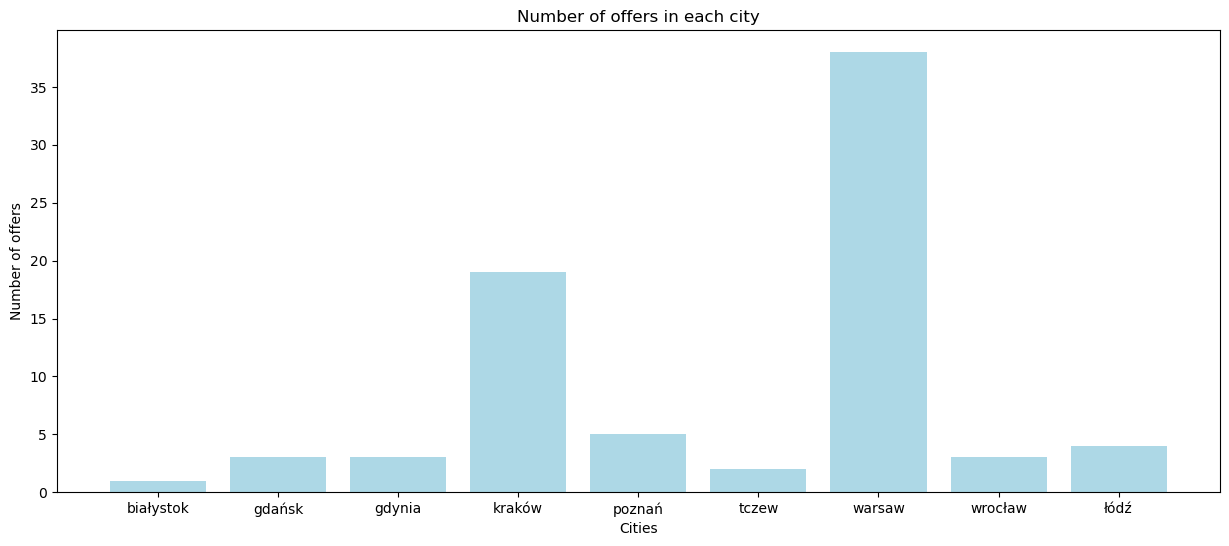

In [46]:

# Vytvoření grafu
plt.figure(figsize=(15, 6))
plt.bar(locations, counts, color = 'lightblue')
plt.xlabel('Cities')
plt.ylabel('Number of offers')
plt.title('Number of offers in each city')
plt.show()

4. kde je nabízena nejvyšší sazba

In [47]:
counts_max = data_grouped_by_location['Salary High'].max()


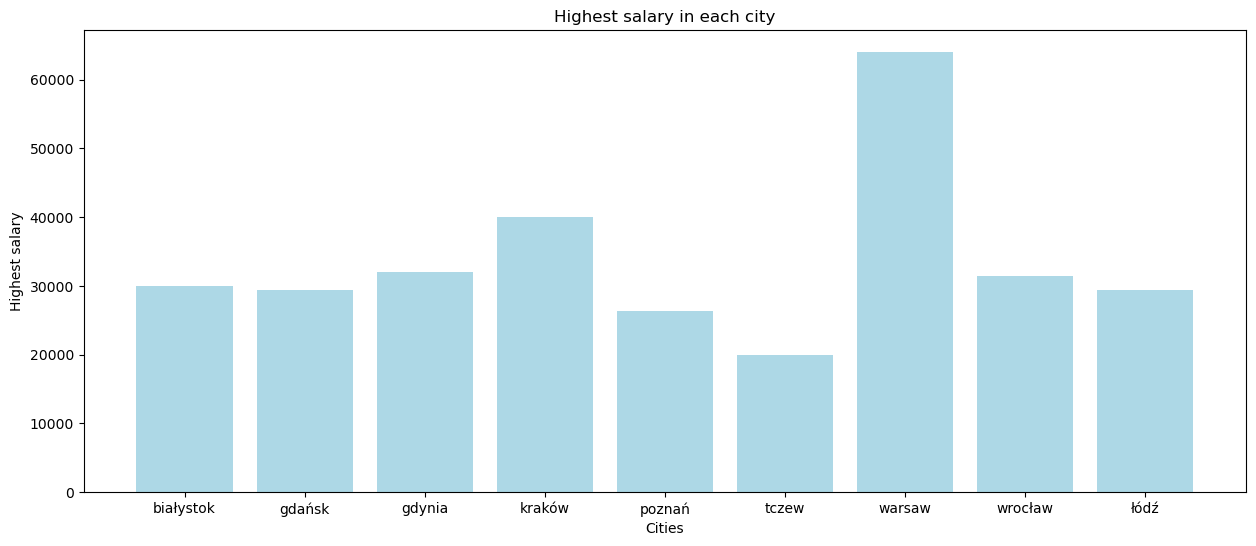

In [48]:
# Vytvoření grafu
plt.figure(figsize=(15, 6))
plt.bar(locations, counts_max, color = 'lightblue')
plt.xlabel('Cities')
plt.ylabel('Highest salary')
plt.title('Highest salary in each city')
plt.show()

5. rozdíl mezi běžným a senior

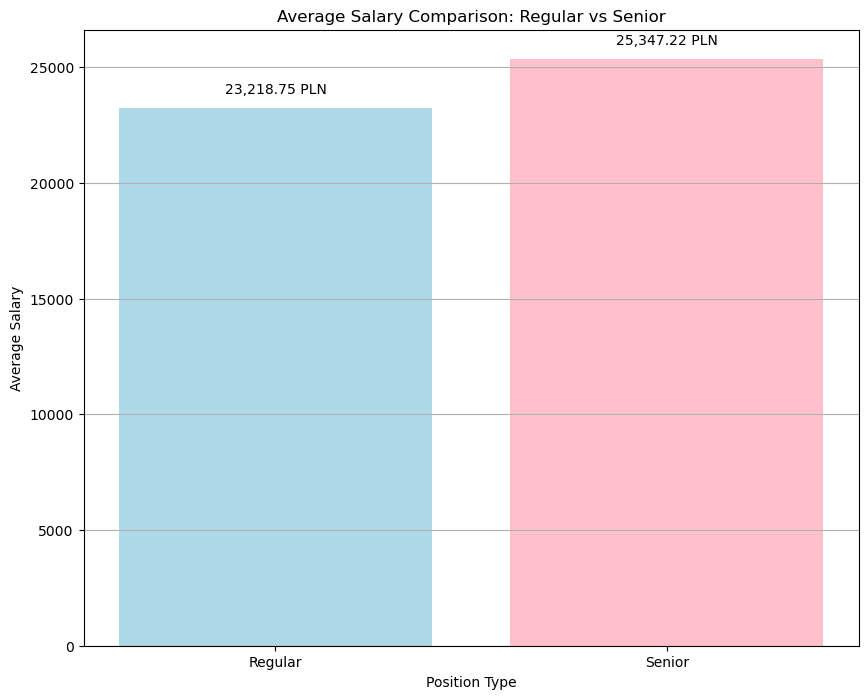

In [49]:
# Příklad DataFrame
result = pd.DataFrame({
    'is_senior': [0, 1],
    'count': [127, 95],
    'avg_salary': [23218.75, 25347.22]
})

# Výpočet rozdílu v průměrném platu mezi seniory a regular pozicemi
regular_salary = result.loc[result['is_senior'] == 0, 'avg_salary'].values[0]
senior_salary = result.loc[result['is_senior'] == 1, 'avg_salary'].values[0]
salary_difference = senior_salary - regular_salary

categories = ['Regular', 'Senior']
salaries = [regular_salary, senior_salary]

# Vytvoření grafu
plt.figure(figsize=(10, 8))
plt.bar(categories, salaries, color=['lightblue', 'pink'])
plt.xlabel('Position Type')
plt.ylabel('Average Salary')
plt.title('Average Salary Comparison: Regular vs Senior')
plt.grid(axis='y')

# Přidání hodnot nad sloupce
for i, value in enumerate(salaries):
    plt.text(i, value + 500, f'{value:,.2f} PLN', ha='center', va='bottom')